# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [3]:
df = pd.read_csv("/content/sample_data/car_data.csv")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.shape

(804, 12)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df['Mileage'].values.reshape(-1,1)
Y = df['Price'].values.reshape(-1,1)
model = LinearRegression()
model.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))

Intercept:[24764.55900606] ,Coefficients:[[-0.1725205]]


In [8]:
eq = "y = {}*x  + {}".format(model.coef_[0],model.intercept_)
print("The linear equation for the data is \n",eq)

The linear equation for the data is 
 y = [-0.1725205]*x  + [24764.55900606]


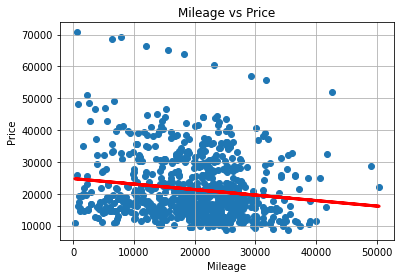

In [9]:
plt.scatter(X,Y)
plt.plot(X, model.predict(X), color="red", linewidth=3)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage vs Price")
plt.grid()
plt.show()

In [10]:
model.score(X,Y)

0.02046344732348926

In [11]:
input_cols = ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']
X = df[input_cols]

In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
func1 = MinMaxScaler(feature_range = (0,1))
func2 = StandardScaler()
X_norm = func1.fit_transform(X)
func2.fit(X)
X_stand = func2.transform(X) 

In [13]:
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[6758.7551436] ,Coefficients:[[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


0.4462643536728379

In [14]:
Y = df['Price'].values.reshape(-1,1)
model2 = LinearRegression()
model2.fit(X_stand,Y)
print("Intercept:{} ,Coefficients:{}".format(model2.intercept_, model2.coef_))
model2.score(X_stand,Y)

Intercept:[21343.14376733] ,Coefficients:[[-1390.44199315  5258.77092032  -869.77988086 -1310.7785287
   2714.12330837  -930.74494929  1497.42117515]]


0.446264353672838

In [15]:
Y = df['Price'].values.reshape(-1,1)
model3 = LinearRegression()
model3.fit(X_norm,Y)
print("Intercept:{} ,Coefficients:{}".format(model3.intercept_, model3.coef_))
model3.score(X_norm,Y)

Intercept:[17538.07307995] ,Coefficients:[[-8507.93110436 15169.51572313 -3463.77121919 -3085.49169276
   6288.99714985 -1993.7952757   3349.36161961]]


0.446264353672838

In [23]:
import itertools as it
def input_combos(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

In [24]:
combos = input_combos(input_cols)

In [25]:
def combo_r2scores( all_combos, df, output='Price'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Price']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

### Task Hard

In [16]:
df1 = df.copy()

In [18]:
df1[['Make','Model','Type']] = df1[['Make','Model','Type']].astype('category')
df1.dtypes

Price        float64
Mileage        int64
Make        category
Model       category
Trim          object
Type        category
Cylinder       int64
Liter        float64
Doors          int64
Cruise         int64
Sound          int64
Leather        int64
dtype: object

In [19]:
df1['Make'] = df1['Make'].cat.codes
df1['Model'] = df1['Model'].cat.codes
df1['Type'] = df1['Type'].cat.codes

In [20]:
df1

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,0,10,Sedan 4D,3,6,3.1,4,1,1,1
1,17542.036083,9135,0,10,Sedan 4D,3,6,3.1,4,1,1,0
2,16218.847862,13196,0,10,Sedan 4D,3,6,3.1,4,1,1,0
3,16336.913140,16342,0,10,Sedan 4D,3,6,3.1,4,1,0,0
4,16339.170324,19832,0,10,Sedan 4D,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,5,21,L300 Sedan 4D,3,6,3.0,4,1,0,0
800,16175.957604,19095,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
801,15731.132897,20484,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0
802,15118.893228,25979,5,21,L300 Sedan 4D,3,6,3.0,4,1,1,0


In [21]:
input_cols = ['Mileage','Cylinder','Make','Model','Type','Liter','Doors','Cruise','Sound','Leather']
X = df1[input_cols]
Y = df1['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[3039.64350271] ,Coefficients:[[-1.71673657e-01  4.87578755e+03  8.32075788e+02 -2.05034394e+02
   4.31124572e+01 -8.92252597e+02 -1.50175555e+03  5.14099964e+03
  -1.33287926e+03  2.77089529e+03]]


0.48569139005488515

In [27]:
combos = input_combos(input_cols)

In [28]:
def combo_r2scores( all_combos, df, output='Price'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Price']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [29]:
output_dict = combo_r2scores(combos,df1,'Price')

In [30]:
max(output_dict)

0.48569139005488515

In [31]:
output_dict[0.48569139005488515] #This combination gives the maximum r2_score

('Mileage',
 'Cylinder',
 'Make',
 'Model',
 'Type',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather')

<AxesSubplot:>

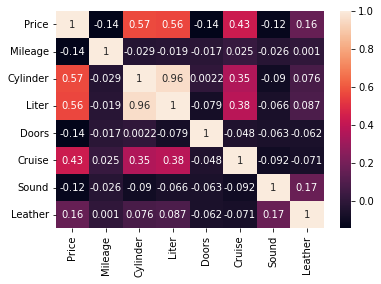

In [33]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

### Final

In [34]:
df1 = df.copy()


In [35]:
df1['Model'] = df1['Model'].astype('category')
df1['Model'] = df1['Model'].cat.codes

In [36]:
df_dummies = pd.get_dummies(df1, columns = ['Make','Type'])

In [37]:
input_cols=['Mileage', 'Cylinder','Liter','Model','Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']

In [38]:
X = df_dummies[input_cols]

In [39]:
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[23377.98090878] ,Coefficients:[[-1.84575188e-01 -1.25812618e+03  5.68575195e+03  5.86830951e+01
  -2.09123334e+03  1.81499295e+02  2.05060415e+02  2.89961148e+02
  -3.96158031e+03  1.22141649e+04 -5.27969841e+03 -5.52735103e+03
   7.75088755e+03 -5.19642271e+03  6.49494131e+03 -5.44932464e+03
  -1.57653214e+03 -1.46170953e+03  1.99262500e+03]]


0.9376502168807379

In [40]:
# trying without model field
df_dummies = pd.get_dummies(df1, columns = ['Make','Type'])

In [41]:
input_cols=['Mileage', 'Cylinder','Liter','Doors', 'Cruise',
       'Sound', 'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn','Type_Convertible', 'Type_Coupe',
       'Type_Hatchback', 'Type_Sedan', 'Type_Wagon']

In [42]:
X = df_dummies[input_cols]

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
Y = df['Price'].values.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X,Y)
print("Intercept:{} ,Coefficients:{}".format(model1.intercept_, model1.coef_))
model1.score(X,Y)

Intercept:[23983.77190962] ,Coefficients:[[-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
   1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
   1.22732515e+04 -5.33495094e+03 -5.47974129e+03  6.95098389e+03
  -4.82285042e+03  6.52818455e+03 -5.49471851e+03 -1.71994175e+03
  -1.69110942e+03  2.37758514e+03]]


0.9363889951039477

There is very less difference in R^2 score

The combination of 'Mileage', 'Cylinder','Liter','Doors', 'Cruise','Sound','Leather','Make' and 'Type' is best combination of features for the linear regression model.